Overfitting:
Building a complex model that does well on the training set but does not generalize to new data is known as overfitting, because we are focusing too much on the particularities of the training data. 

Underfitting: 
Using too simple a model is called underfitting, because we don't explain the target output for the training data well enough.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn

X.shape: (26, 2)


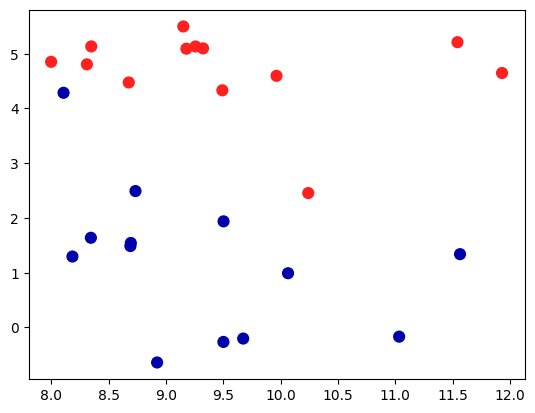

In [20]:
X, y = mglearn.datasets.make_forge()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
print("X.shape: %s" % (X.shape, ))

In [21]:
df = pd.DataFrame(X, columns=["feature1", "feature2"])
df["target"] = y
df

,feature1,feature2,target
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0
5,8.309889,4.806240,1
6,11.930271,4.648663,1
7,9.672847,-0.202832,0
8,8.348103,5.134156,1
9,8.674947,4.475731,1


(-3.1, 3.1)

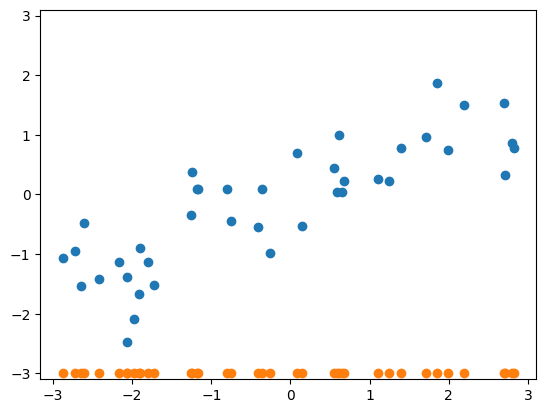

In [22]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, "o")
plt.plot(X, -3 * np.ones(len(X)), "o")
plt.ylim(-3.1, 3.1)

In [23]:
np.ones(len(X))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [25]:
np.bincount(cancer.target)

array([212, 357])

In [26]:
cancer.keys()
print(cancer.data.shape)
print(cancer.target_names)
cancer.feature_names

(569, 30)
['malignant' 'benign']


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Text(0.5, 1.0, 'forge_one_neighbor')

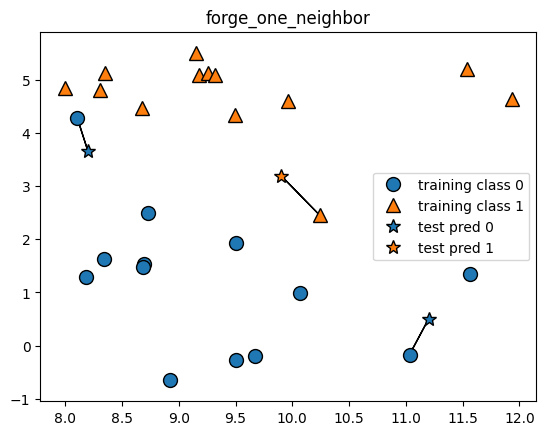

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("forge_one_neighbor")

K nearest neighbor(knn) is a supervised learning algorithm used for classfication and regression. It makes predictions based on the closest training data points. To predict a new data point:
1. compute the distance between the new point and all training points
2. select the k closest points
3. for classification: Take a majority vote of their labels
4. for regression: Take the average of their values
k = number of neighbors
* small k -> very flexible, can overfit
* large k -> smoother boundary, may underfit.
This reflects the bias-variance tradeoff
KNN is based on the assumption: similar points in feature space tend to have similar outcomes. It relies on a distance metric, usually: Euclidean distance

In [28]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [30]:
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.8571428571428571

In [31]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

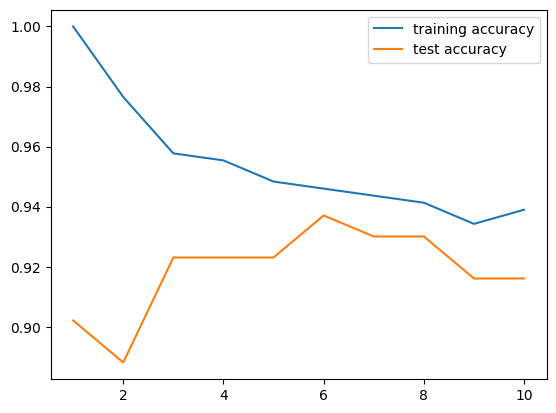

In [32]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.legend()

In [33]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [34]:
reg.predict(X_test)
reg.score(X_test,y_test)

0.8344172446249606

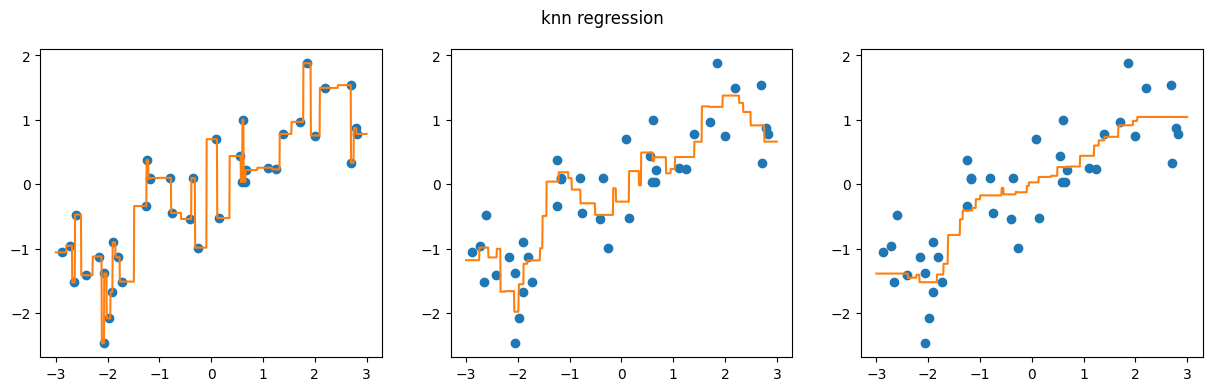

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.suptitle("knn regression")
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    ax.plot(X, y, "o")
    ax.plot(line, reg.predict(line))